In [393]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import numpy as np
import statsmodels.api as sm

In [394]:
# Cargar datos
file_path = r'C:\Users\emisi\OneDrive\INCAE_Análisis de Datos, Innovación y Tecnología\PAIT\Nuestro Diario\Bases de Datos\Análisis de Bases de Datos\DatosNacionales.csv'
df = pd.read_csv(file_path, delimiter= ';')
df.head()

,id,fecha,day,month,year,region,titulo,subtitular,cant_notas,politica,roja,deporte,accidente,comunitaria,nacionales,internacional,modelo_portada,especial,publicidad,contraportada,modelo,palabras_titulo,palabras_st,envio_total,cobrable,devuelto,vendido,total_paginas
0,010222nacional,2/1/2022,Sunday,January,2022,nacional,celebracion lo lleva a la muerte,"ya no llego a darles el abrazo a sus papas, en...",4,0,3,0,0,0,1,0,0,0,0,modelo,1,6,13,94993,93185,11937,81248,36
1,010322nacional,3/1/2022,Monday,January,2022,nacional,campeon historico,los toros suman su primer titulo de liga nacional,5,0,1,1,2,1,0,0,0,0,1,deporte,1,2,9,110810,108409,6740,101669,34
2,010422nacional,4/1/2022,Tuesday,January,2022,nacional,arde ensambladora,se destruyen miles de motos en amatitlan,4,0,1,0,3,0,0,0,0,0,0,nacionales,1,2,7,97543,95151,8336,86815,32
3,010522nacional,5/1/2022,Wednesday,January,2022,nacional,balean albaniles,sicarios los esperaban en esquina del centro d...,3,0,2,0,0,0,0,1,0,0,1,modelo,1,2,10,96234,93842,14682,79160,32
4,010622nacional,6/1/2022,Thursday,January,2022,nacional,feliz dia de reyes,-,1,0,0,0,0,0,0,1,0,1,0,modelo,1,4,1,96254,93851,9796,84055,32


In [395]:
# Eliminar columnas irrelevantes
df = df.drop(columns=["id", "titulo", "subtitular", "fecha"], errors="ignore")

# Verificar si hay valores nulos y llenarlos con 0 o la mediana
df = df.fillna(0)


In [396]:
# Cargar el dataset
file_path = "DatosNacionales.csv"  # Asegúrate de colocar la ruta correcta
df = pd.read_csv(file_path, delimiter=";")

# Mostrar las columnas para verificar nombres
print("Columnas disponibles en el dataset:", df.columns)

# Eliminar columnas irrelevantes (si existen)
df = df.drop(columns=["id", "titulo", "subtitular", "fecha"], errors="ignore")

# Lista de variables categóricas
categorical_vars = ["day", "month", "year", "modelo_portada", "especial", "publicidad", "contraportada", "modelo"]

# Verificar qué columnas existen en el dataset
existing_categorical_vars = [col for col in categorical_vars if col in df.columns]
print("Variables categóricas encontradas:", existing_categorical_vars)

# Convertir solo las columnas que existen
df = pd.get_dummies(df, columns=existing_categorical_vars, drop_first=True)

# Asegurar que todas las variables sean numéricas
df = df.apply(pd.to_numeric, errors="coerce")

Columnas disponibles en el dataset: Index(['id', 'fecha', 'day', 'month', 'year', 'region', 'titulo', 'subtitular',
       'cant_notas', 'politica', 'roja', 'deporte', 'accidente', 'comunitaria',
       'nacionales', 'internacional', 'modelo_portada', 'especial',
       'publicidad', 'contraportada', 'modelo', 'palabras_titulo',
       'palabras_st', 'envio_total', 'cobrable', 'devuelto', 'vendido',
       'total_paginas'],
      dtype='object')
Variables categóricas encontradas: ['day', 'month', 'year', 'modelo_portada', 'especial', 'publicidad', 'contraportada', 'modelo']


In [397]:
# Definir las variables predictoras
predictors = [
    "envio_total", "devuelto", "cant_notas", "politica", "roja",
    "deporte", "accidente", "comunitaria", "nacionales", "internacional", "palabras_titulo", "palabras_st","total_paginas"
] + list(df.columns[df.columns.str.startswith(tuple(existing_categorical_vars))])

# Crear la matriz de predictores X
X = df[predictors]


In [398]:
# Variable objetivo
y = df["vendido"]

# Llenar valores NaN para evitar errores
X = X.fillna(0)
y = y.fillna(0)

# Agregar la constante
X = sm.add_constant(X)

In [399]:
# Verificar tipos de datos en X
print("Tipos de datos en X:")
print(X.dtypes)

# Buscar columnas no numéricas
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("\nColumnas no numéricas en X:", non_numeric_cols)

# Buscar valores NaN en X
print("\nValores NaN en X:")
print(X.isnull().sum())

# Asegurar que todas las columnas sean numéricas
X = X.apply(pd.to_numeric, errors="coerce")
y = y.apply(pd.to_numeric, errors="coerce")

# Rellenar NaN con 0 para evitar errores en la regresión
X = X.fillna(0)
y = y.fillna(0)

# Convertir todo a tipo float
X = X.astype(float)
y = y.astype(float)

Tipos de datos en X:
const                               float64
envio_total                           int64
devuelto                              int64
cant_notas                            int64
politica                              int64
roja                                  int64
deporte                               int64
accidente                             int64
comunitaria                           int64
nacionales                            int64
internacional                         int64
palabras_titulo                       int64
palabras_st                           int64
total_paginas                         int64
day_Monday                             bool
day_Saturday                           bool
day_Sunday                             bool
day_Thursday                           bool
day_Tuesday                            bool
day_Wednesday                          bool
month_August                           bool
month_December                         bool
month_Febru

In [400]:
# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

In [401]:
# Mostrar los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                vendido   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     143.2
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:46:32   Log-Likelihood:                -12111.
No. Observations:                1208   AIC:                         2.431e+04
Df Residuals:                    1164   BIC:                         2.453e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Regresión Lineal con Variables de Interés**

In [402]:
# Cargar datos
file_path = r'C:\Users\emisi\OneDrive\INCAE_Análisis de Datos, Innovación y Tecnología\PAIT\Nuestro Diario\Bases de Datos\Análisis de Bases de Datos\DatosNacionales.csv'
df = pd.read_csv(file_path, delimiter= ';')
df.head()

,id,fecha,day,month,year,region,titulo,subtitular,cant_notas,politica,roja,deporte,accidente,comunitaria,nacionales,internacional,modelo_portada,especial,publicidad,contraportada,modelo,palabras_titulo,palabras_st,envio_total,cobrable,devuelto,vendido,total_paginas
0,010222nacional,2/1/2022,Sunday,January,2022,nacional,celebracion lo lleva a la muerte,"ya no llego a darles el abrazo a sus papas, en...",4,0,3,0,0,0,1,0,0,0,0,modelo,1,6,13,94993,93185,11937,81248,36
1,010322nacional,3/1/2022,Monday,January,2022,nacional,campeon historico,los toros suman su primer titulo de liga nacional,5,0,1,1,2,1,0,0,0,0,1,deporte,1,2,9,110810,108409,6740,101669,34
2,010422nacional,4/1/2022,Tuesday,January,2022,nacional,arde ensambladora,se destruyen miles de motos en amatitlan,4,0,1,0,3,0,0,0,0,0,0,nacionales,1,2,7,97543,95151,8336,86815,32
3,010522nacional,5/1/2022,Wednesday,January,2022,nacional,balean albaniles,sicarios los esperaban en esquina del centro d...,3,0,2,0,0,0,0,1,0,0,1,modelo,1,2,10,96234,93842,14682,79160,32
4,010622nacional,6/1/2022,Thursday,January,2022,nacional,feliz dia de reyes,-,1,0,0,0,0,0,0,1,0,1,0,modelo,1,4,1,96254,93851,9796,84055,32


In [403]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from scipy.stats import pearsonr

# Cargar el Dataset
file_path = "DatosNacionales.csv"  # Asegúrate de colocar la ruta correcta
df = pd.read_csv(file_path, delimiter=";") 

# Eliminar las variables especificadas
columns_to_exclude = ["region", "titulo", "modelo_portada", "especial", "id", "fecha", "year", "subtitular", "cobrable", "envio_total", "devuelto"]
df = df.drop(columns=columns_to_exclude, errors="ignore")

# Lista de variables categóricas que deben ser convertidas a dummies
categorical_vars = ["day", "month", "contraportada"]

# Verificar qué variables categóricas existen en el dataset
existing_categorical_vars = [col for col in categorical_vars if col in df.columns]

# Convertir variables categóricas en dummies
df = pd.get_dummies(df, columns=existing_categorical_vars, drop_first=True)

# Asegurar que todas las variables sean numéricas
df = df.apply(pd.to_numeric, errors="coerce")

# Definir las variables predictoras (X) excluyendo "vendido"
X = df.drop(columns=["vendido"])

# Variable objetivo (y)
y = df["vendido"]

# Llenar valores NaN para evitar errores en la regresión
X = X.fillna(X.median())  # Usando la mediana
y = y.fillna(y.median())  # Usando la mediana

# Convertir todas las variables a tipo float
X = X.astype(float)
y = y.astype(float)

# Agregar la constante
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Generar predicciones con el modelo refinado
y_pred = model.predict(X)

# 1. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 2. Absolute Error
absolute_error = mean_absolute_error(y, y_pred)
print(f"Absolute Error: {absolute_error}")

# 3. Relative Error (Lenient)
relative_error = np.mean(np.abs((y - y_pred) / y)) * 100
print(f"Relative Error (Lenient): {relative_error}%")

# 4. Squared Error
squared_error = np.mean((y - y_pred) ** 2)
print(f"Squared Error: {squared_error}")

# 5. Correlation Coefficient (R)
correlation, _ = pearsonr(y, y_pred)
print(f"Correlation Coefficient: {correlation}")


Root Mean Squared Error (RMSE): 10125.701639996407
Absolute Error: 7413.056947070495
Relative Error (Lenient): 28.227706197329848%
Squared Error: 102529833.70222592
Correlation Coefficient: 0.6747074436627937


In [404]:
# Mostrar los resultados completos sin truncamiento
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

# Ahora muestra el resumen completo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                vendido   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     27.18
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          2.33e-128
Time:                        14:46:33   Log-Likelihood:                -12855.
No. Observations:                1208   AIC:                         2.578e+04
Df Residuals:                    1171   BIC:                         2.597e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

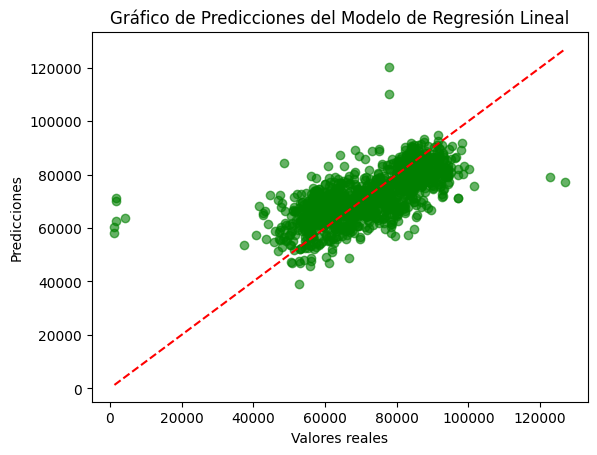

In [405]:
import matplotlib.pyplot as plt

# Generar predicciones con el modelo ajustado
y_pred = model.predict(X)

# Crear el gráfico de dispersión de predicciones vs valores reales
plt.scatter(y, y_pred, color='green', alpha=0.6)

# Añadir la línea roja para la predicción perfecta
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')

# Añadir etiquetas y título
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de Predicciones del Modelo de Regresión Lineal")

# Mostrar el gráfico
plt.show()
